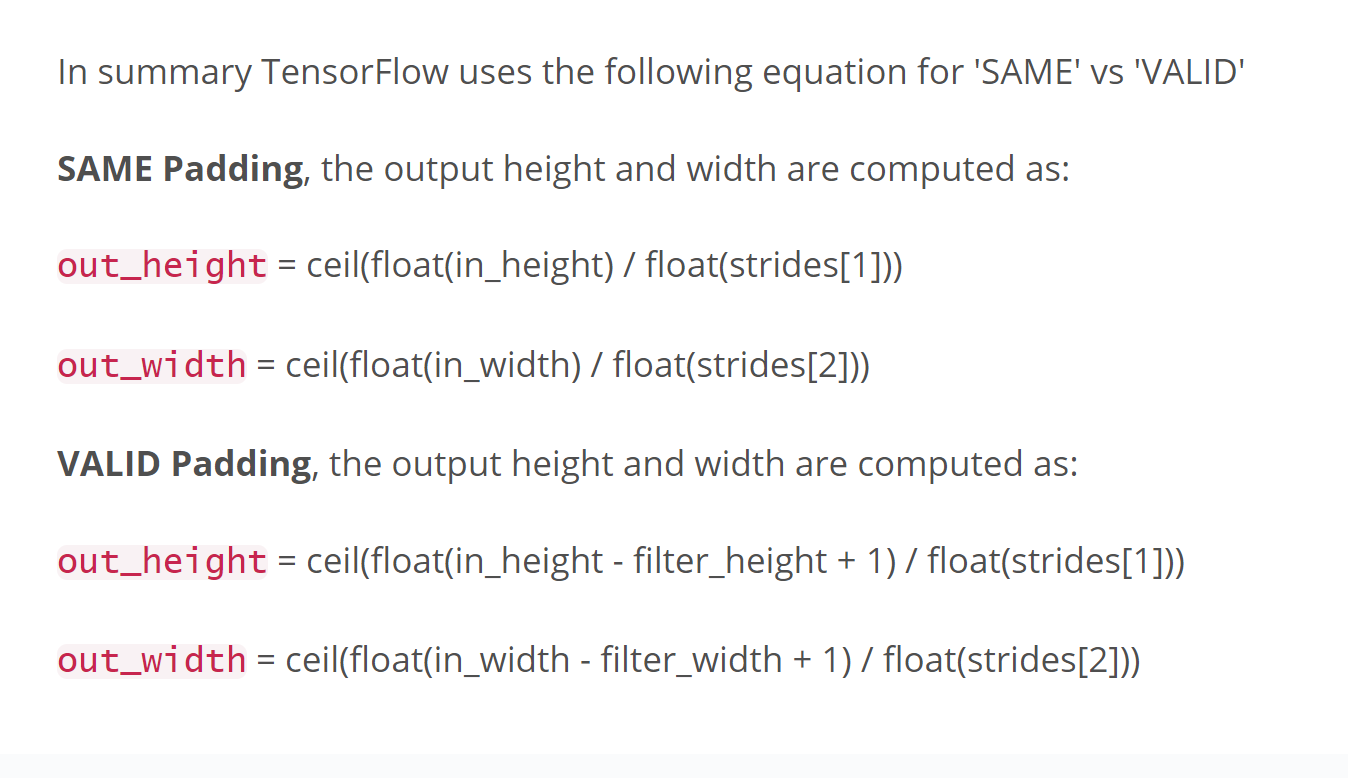

In [1]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets(".",one_hot=True,reshape=False)

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


In [23]:
# Parameters
batch_size = 2048
learning_rate = 0.01
epochs = 5

# Validation size
test_valid_size = 512

# NW param
dropout = 0.75 # Keep probability
n_classes = 10

# Weight and bias


weights = {
    
    'wc1' : tf.Variable(tf.random_normal([5,5,1,32])),
    'wc2' : tf.Variable(tf.random_normal([5,5,32,64])),
    'wd1' : tf.Variable(tf.random_normal([7*7*64,1024])),
    'out' : tf.Variable(tf.random_normal([1024,n_classes]))
    
}

biases = {
    
    'bc1' : tf.Variable(tf.random_normal([32])),
    'bc2' : tf.Variable(tf.random_normal([64])),
    'bd1' : tf.Variable(tf.random_normal([1024])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
    
}

In [12]:
def conv2d(x,W,b,strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [15]:
def maxpool2d(x,k):   
    return tf.nn.max_pool(x, ksize=[1, k, k, 1],strides=[1, k, k, 1],padding='SAME')

In [18]:
def conv_net(x,weights,biases,dropout):
    # Layer 1 - 28*28*1 to 14*14*32
    conv1 = conv2d(x,weights['wc1'],biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    
    # Layer 2 - 14*14*32 to 7*7*64
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    
    # Fully connected layer - 7*7*64 to 1024
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    
    # Output Layer - class prediction - 1024 to 10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [24]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

# Model
logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(\
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)
    
# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf. global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for batch in range(mnist.train.num_examples//batch_size):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: dropout})
            
            # Calculate batch loss and accuracy
            loss = sess.run(cost, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: 1.})
            valid_acc = sess.run(accuracy, feed_dict={
                x: mnist.validation.images[:test_valid_size],
                y: mnist.validation.labels[:test_valid_size],
                keep_prob: 1.})

        print('Epoch {:>2}, Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
            epoch + 1,
            loss,
            valid_acc))
            
         # Calculate Test Accuracy
        test_acc = sess.run(accuracy, feed_dict={
        x: mnist.test.images[:test_valid_size],
        y: mnist.test.labels[:test_valid_size],
        keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))
            
            
            
            
            
            
    

Epoch  1, Loss:    98.7045 Validation Accuracy: 0.089844
Epoch  2, Loss:    49.1359 Validation Accuracy: 0.105469
Epoch  3, Loss:    25.2665 Validation Accuracy: 0.105469


KeyboardInterrupt: 